### Problem Statement

As a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Task 1: Data Preparation and Exploration

1. Import the data from the `"social_network_ads.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of users' age and estimated salary using scatter plots.

In [3]:
# Step 1: Import the data from the "social_network_ads.csv" file and store it in a variable 'df'
df = pd.read_csv("social_network_ads.csv")

# Step 2: Display the number of rows and columns in the dataset
print("Number of rows and columns:", df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (400, 5)
First few rows of the dataset:


,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Step 4: Check for any missing values in the dataset and handle them appropriately
print("Missing values in the dataset:")
print(df.isna().sum())

Missing values in the dataset:
user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64


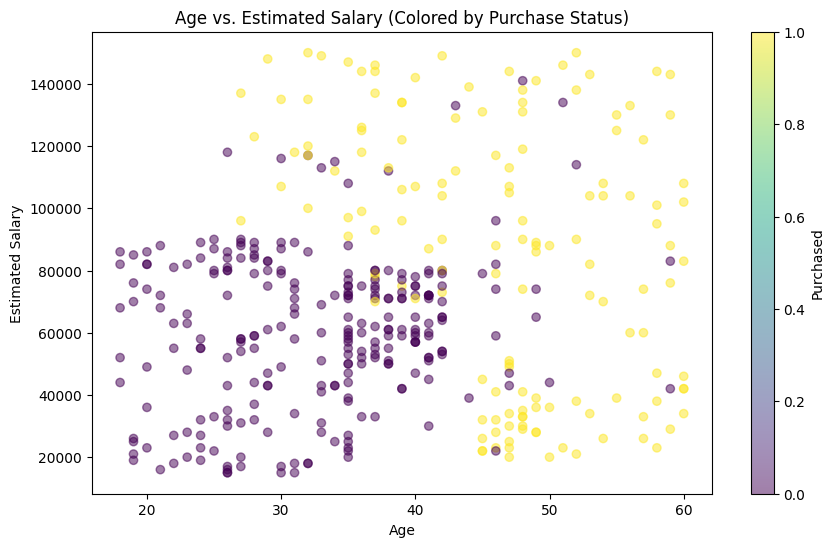

In [5]:
# Step 5: Visualize the distribution of users' age and estimated salary using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['estimated_salary'], c=df['purchased'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')
plt.colorbar(label='Purchased')
plt.show()

### Task 2: Model Training Using Logistic Regression

1. Encode the `gender` column (Male as 0 and Female as 1).
2. Select the features `(age, estimated_salary, gender)` and the target variable `(purchased)` for modeling.
3. Split the data into training and test sets with a test size of 30%.
4. Initialize and train a Logistic Regression model using the training data.
5. Print the model's coefficients and intercept.

In [6]:
# Step 1: Encode the gender column (Male as 0 and Female as 1)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Step 2: Select the features and target variable for modeling
X = df[['age', 'estimated_salary', 'gender']]
y = df['purchased']

# Step 3: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 4: Initialize and train a Logistic Regression model using the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Print the model's coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [[ 1.99914592e-01  3.33049169e-05 -2.49140891e-01]]
Model intercept: [-10.889199]


### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using a classification report, including precision, recall, and accuracy metrics.

In [8]:
# Step 1: Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Step 2: Evaluate the model using a classification report, including precision, recall, and accuracy metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.94      0.68      0.79        47

    accuracy                           0.86       120
   macro avg       0.88      0.83      0.84       120
weighted avg       0.87      0.86      0.85       120

